# Python Script T-test MSI
## Case Study Strategic Comparison 

### Hipotesis
- **H0** = Tidak terdapat perbedaan signifikan antara perusahaan yang mengimplementasikan strategic formulation secara tepat dengan *revenue* dari perusahaan.
- **H1** = Terdapat perbedaan signifikan antara perusahaan yang mengimplementasikan strategic formulation secara tepat dengan *revenue* dari perusahaan.

### Note yang harus di penuhi sebelum analisis data :
- Sample Saling Independent
- Terdistribusi Normal
- Memiliki varians yang sama

### Level of Error
$$\alpha: 0.05$$ 

In [101]:
# Library Import

import pandas as pd
import numpy as np
import scipy as sp
import pingouin as pg
import seaborn as sns

In [85]:
# Import Data

data = r'C:\Users\ilham\MSI-Paper\20220423-DataRevenueTelco.csv'
df = pd.read_csv(data)

df

,Company,Revenue,Year,Quarter
0,XL,5.974,2019,Q1
1,XL,6.295,2019,Q2
2,XL,6.466,2019,Q3
3,XL,6.415,2019,Q4
4,XL,6.500,2020,Q1
5,XL,6.587,2020,Q2
6,XL,6.576,2020,Q3
7,XL,5.861,2020,Q4
8,XL,6.250,2021,Q1
9,XL,6.728,2021,Q2


## Statistik Deskriptif

In [86]:
# Kategorikan data yang ada

df.dtypes
xl = df.query('Company == "XL"')['Revenue']
isat = df.query('Company == "Indosat"')['Revenue']
df.groupby('Company').Revenue.describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Indosat,12.0,7.119250,0.699799,6.046,6.55225,7.202,7.41825,8.333
XL,12.0,6.453417,0.324397,5.861,6.28375,6.483,6.62225,6.962


- Dapat di lihat pada data di atas nilai mean dari XL dan Indosat menunjukan perbedaan yang sedikit di bandingkan dengan nilai median hal ini menunjukan bahwa data revenue dari XL bersih dan tidak ada outlier

## Uji Normalitas Data

Uji dilakukan dengan menguji *shapiro-wilks* apakah data tersebar secara normal dan dapat digunakan dalam t-test

In [92]:
print('XL P-Value : ',sp.stats.shapiro(xl).pvalue)
print('Indosat P-Value : ',sp.stats.shapiro(isat).pvalue)

XL P-Value :  0.9321033954620361
Indosat P-Value :  0.9178150296211243


array([<AxesSubplot:title={'center':'Indosat'}>,
       <AxesSubplot:title={'center':'XL'}>], dtype=object)

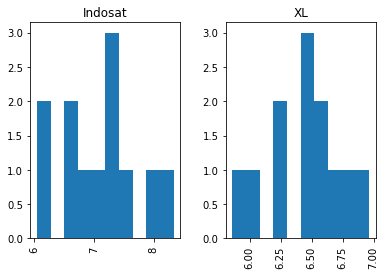

In [103]:
# Plot histogram normalitas
df.hist(by='Company',column='Revenue')

<AxesSubplot:xlabel='Company', ylabel='Revenue'>

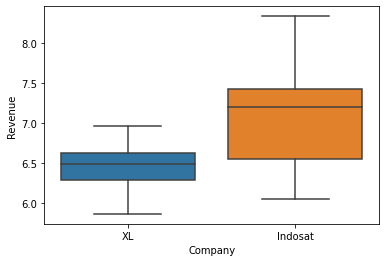

In [104]:
# Plot data menggunakan box plot
sns.boxplot(x='Company',y='Revenue', data=df)

- Dapat dilihat dari **p value** dan **plot histogram** menunjukan data terdistribusi secara normal.

## Uji Homogenitas dari Variance

- Uji homogenitas digunakan untuk memastikan nilai dari **Variance** dari dua kelompok bernilai sama.
- Hal ini dapat di tunjukan dari **P-Value**, apabila P-Value > 0.05 maka Variance dari kedua kelompok dianggap sama.

In [93]:
print('P-Value : ',sp.stats.levene(xl,isat).pvalue)

P-Value :  0.03431025506001013


- Dapat dilihat bahwa dari p-value data di dapatkan memiliki **varians** yang berbeda, sehingga analisis t-test yang akan dilakukan adalah **welch t-test**.


## Uji Welch T-Test
- Uji welch t-test melihat apakah terdapat perbedaan signifikan antara dua buah nilai dari sampel.

In [99]:
res = sp.stats.ttest_ind(xl, isat,equal_var=True)
print("Statistics : ",res.statistic)
print("P Value : ",res.pvalue)

Statistics :  -2.990304072237936
P Value :  0.006744412159193342


- Dapat dilihat berdasarkan nilai di atas **P Value**, bernilai < 0.05, hal ini menunjukan bahwa terdapat perbedaan **signifikan** pada perusahaaan yang mengimplementasikan strategic formulation secara tepat dengan revenue perusahaan, dibandingkan dengan perusahaan yang tidak mengimplementasikan secara tepat.